### Emma Klemets, 260775167   
All my work, code, output and written answers are in this notebook.

In [1]:
import numpy as np
import matplotlib

#for pop out plots - windows
# matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import time
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

from particleClass import *

### Part 4: 
In cosmology, we start the universe with a scale-invariant power spectrum, so mass fluctuations are proportional to $k^{−3}$. Start with the particles on a grid, but with masses derived from a realization of $k^{−3}$ and use periodic boundary conditions (although not strictly necessary, you may with to start with your particles in the center of grid cells rather than at the corners). How does your universe look now?

From https://garrettgoon.com/gaussian-fields/

Scale Invariant: $P(k) \propto k^{-d}$  in  spatial dimensions. A scale invariant power spectrum corresponds to fluctuations which have the same correlations no matter how separated the two points are:

In [2]:
"""
what is k?? - wavenumber - but of what?

you create a 3d grid with a k^3 dependence, apply noise, and then apply an inverse fourier transform. 
This gives you a density map with a k^3 spatial dependence


"""

'\nwhat is k?? - wavenumber - but of what?\n\nyou create a 3d grid with a k^3 dependence, apply noise, and then apply an inverse fourier transform. \nThis gives you a density map with a k^3 spatial dependence\n\n\n'

In [31]:
def P_k_dist(gridSize, dx, n):

    x = np.arange(0, gridSize[0], dx)
    N = gridSize[0]

    #0-N/2, -N/2 - (-1)
    N = gridSize[0] + 1 #only going to work with even grid sizes
    a = np.arange(0, N/2, dx)
    b = np.arange(-N/2+1, -1, dx)

    print(len(a), len(b))

    k_grid = np.concatenate((a, b)) * 2 * np.pi / N

    k_2d = []

    for i in range(0, len(k_grid)):
        kk = []
        for j in range(0, len(k_grid)):
            kk.append(np.sqrt(k_grid[i]**2 + k_grid[j]**2))
        k_2d.append(kk)

    k_2d = np.array(k_2d)
    # k_2d = np.sqrt(np.outer(k_grid**(2), k_grid**(2)))
#     print(k_2d)

    pk_2d = 1/np.abs(k_2d**n)

    nans = np.argwhere(np.isinf(pk_2d))

    for i in nans:
        pk_2d[i[0]][i[1]] = 0.0

    pk_2d = np.sqrt(pk_2d)

    whitenoise = np.fft.fft(np.random.normal(0,1,(int(gridSize[0]/dx), int(gridSize[0]/dx) )))
    pk_2d_noise = pk_2d*whitenoise

    kgrid_inv = np.fft.irfftn(pk_2d_noise, s=pk_2d_noise.shape)
    
    """
    fig, ax = plt.subplots() #looks a little better but it's very smooth

    c = ax.pcolormesh(x, x, kgrid_inv, shading='auto')#, cmap='RdBu')#, vmin=z_min, vmax=z_max)
    ax.set_title('pcolormesh')
    # set the limits of the plot to the limits of the data
    # ax.axis([x.min(), x.max(), y.min(), y.max()])
    fig.colorbar(c, ax=ax)
#     plt.savefig('powerSpec.jpg')#, dpi=1200)
    plt.pause(1.0)
    """
    #rescaling it from a density to a probability
    #I think this is probably wrong, but it keeps the structure and I don't know what else to do
    minP = np.min(kgrid_inv)
    maxP = np.max(kgrid_inv)

    q_s = kgrid_inv/(maxP - minP)

    m = np.min(q_s)
    q_s_up = q_s - m

    return q_s_up, x

In [ ]:
#get x pos randomly as before, figure out which cells they are in
#then get masses for each particle based on the P(x) in that cell from above work



In [35]:
n=100000 #runs really quite slow with even just 10 000 points
d=2
gridSize = [100, 100]#, 15]
dt_t = 1.

#get the prob distribution
P_bad, x_arr = P_k_dist(gridSize, dt_t, d)

#single particle at rest
x=np.random.uniform(1.0, gridSize[0]-1.0,(n,d)) #need to place closer to center
v=np.random.randn(n,d)*0 #at rest?

# print(x)

m=np.ones(n)*5 #mass

minP = np.min(P_bad)
maxP = np.max(P_bad)
print(minP, maxP)

print(np.sum(P_bad))

# np.random.normal()

51 49
0.0 1.0
5096.646702978732


<ipython-input-31-45d492bd287c>:27: RuntimeWarning: divide by zero encountered in true_divide
  pk_2d = 1/np.abs(k_2d**n)


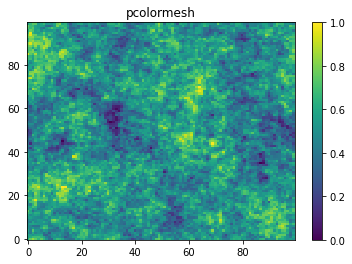

In [36]:
fig, ax = plt.subplots() #looks a little better but it's very smooth

c = ax.pcolormesh(x_arr, x_arr, P_bad, shading='auto')#, cmap='RdBu')#, vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
# ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)
#     plt.savefig('powerSpec.jpg')#, dpi=1200)
plt.show()


In [ ]:
#need to rescale this so it's (0, 1)



In [ ]:
# fig, ax = plt.subplots() #looks a little better but it's very smooth

# c = ax.pcolormesh(x, x, m, shading='auto')#, cmap='RdBu')#, vmin=z_min, vmax=z_max)
# ax.set_title('masses')

# fig.colorbar(c, ax=ax)
# # plt.savefig('powerSpec.jpg')#, dpi=1200)
# plt.pause(1.0)

In [6]:
from FyeldGenerator import generate_field

# https://github.com/cphyc/FyeldGenerator

<ipython-input-7-ed5bb0ec56cf>:6: RuntimeWarning: divide by zero encountered in power
  return np.power(k, -n)


<Figure size 432x288 with 0 Axes>

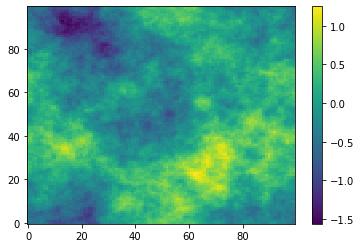

In [7]:

plt.figure()

# Helper that generates power-law power spectrum, can U just use this?
def Pkgen(n):
    def Pk(k):
        return np.power(k, -n)

    return Pk

# Draw samples from a normal distribution
def distrib(shape):
    a = np.random.normal(loc=0, scale=1, size=shape)
    b = np.random.normal(loc=0, scale=1, size=shape)
    return a + 1j * b

gridSize = [100, 100]
shape = (gridSize[0], gridSize[1])
dx=1.0

x_arr = np.arange(0, gridSize[0], dx)

field = generate_field(distrib, Pkgen(3), shape)


fig, ax = plt.subplots() #this does actually look like mine quite a bit

c = ax.pcolormesh(x_arr, x_arr, field, shading='auto')

fig.colorbar(c, ax=ax)
plt.show()

In [26]:
minP = np.min(field)
maxP = np.max(field)

q_s = field/(maxP - minP)

m = np.min(q_s)
q_s_up = q_s - m


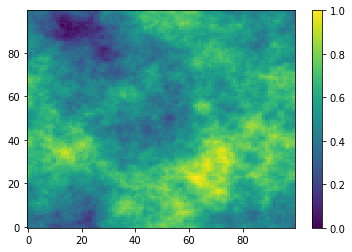

In [27]:
fig, ax = plt.subplots() #this does actually look like mine quite a bit

c = ax.pcolormesh(x_arr, x_arr, q_s_up, shading='auto')

fig.colorbar(c, ax=ax)
plt.show()

In [ ]:
parts=Particles(x,v,m, gridSize, grid_dx=dt_t, BC_per=False)

dt=0.01

fig = plt.figure()
ax=fig.add_subplot(111,projection="3d")
# ax = Axes3D(fig)
ax.set_xlabel("x",fontsize=14)
ax.set_ylabel("y",fontsize=14)
ax.set_zlabel("z",fontsize=14)

ax.set_xlim3d(0, gridSize[0])
ax.set_ylim3d(0,gridSize[1])
ax.set_zlim3d(0,gridSize[2])

ax.set_title("Initial conditions of the Universe\n",fontsize=20)
scatt = ax.scatter(parts.x[:,0], parts.x[:,1], parts.x[:,2], color="royalblue",marker=".")#,s=.1)
plt.pause(.4)

[ 0.68566136 -0.59008471 -0.42588808 -0.74988139  0.65395889  0.16946557
 -0.96813549  0.69407084 -0.65128748 -0.90014689]


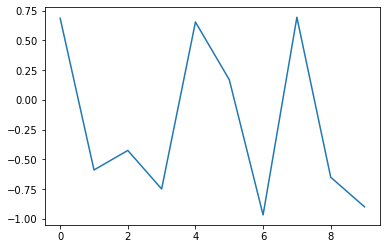

In [22]:
q = np.random.uniform(-1, 1, 10)
print(q)

minP = np.min(q)
maxP = np.max(q)

q_s = q/(maxP - minP)

m = np.min(q_s)
q_s_up = q_s - m

# plt.plot(q)

1.0


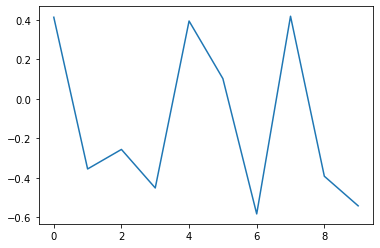

In [23]:
q_s = q/(maxP - minP)
plt.plot(q_s)

print(np.max(q_s)-np.min(q_s))

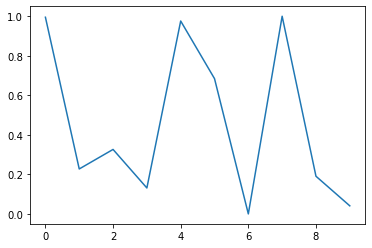

In [24]:
m = np.min(q_s)
q_s_up = q_s - m
plt.plot(q_s_up)

In [25]:
print(min(q_s_up), max(q_s_up))

0.0 1.0
